In [ ]:
import requests
import datetime

# Function to generate the file URL based on the date
def generate_file_url(date):
    base_url = "http://files.tmdb.org/p/exports/"
    formatted_date = date.strftime("%m_%d_%Y")
    file_url = f"{base_url}movie_ids_{formatted_date}.json.gz"
    #file_url = f"{base_url}movie_ids_08_01_2024.json.gz"
    return file_url

# Calculate the date a week ago
date_a_week_ago = datetime.datetime.now() - datetime.timedelta(days=7)

# Generate file URL for a week ago
file_url = generate_file_url(date_a_week_ago)
print(file_url)
# Download the file using requests
response = requests.get(file_url)

# Check if the request was successful
if response.status_code == 200:
    # Save the file
    with open("movie_ids.json.gz", "wb") as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file.")


http://files.tmdb.org/p/exports/movie_ids_08_08_2024.json.gz
File downloaded successfully.


In [ ]:
from datetime import datetime, timedelta

# Calculate the date 3 days before today

## date_three_days_ago = datetime.now() - timedelta(days=3)
## formatted_date = date_three_days_ago.strftime("%m_%d_%Y")
## print(formatted_date)
# Use !wget command to download the file
## !wget http://files.tmdb.org/p/exports/movie_ids_{formatted_date}.json.gz

03_20_2024
--2024-03-23 18:33:30--  http://files.tmdb.org/p/exports/movie_ids_03_20_2024.json.gz
Resolving files.tmdb.org (files.tmdb.org)... 18.160.225.65, 18.160.225.86, 18.160.225.96, ...
Connecting to files.tmdb.org (files.tmdb.org)|18.160.225.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18916896 (18M) [binary/octet-stream]
Saving to: ‘movie_ids_03_20_2024.json.gz’

movie_ids_03_20_202 100%[===================>]  18.04M   117MB/s    in 0.2s    

2024-03-23 18:33:30 (117 MB/s) - ‘movie_ids_03_20_2024.json.gz’ saved [18916896/18916896]



In [ ]:
!gunzip movie_ids.json.gz



In [ ]:
filename = "movie_ids.json"
print(filename)

movie_ids.json


In [ ]:
!head -n 10 movie_ids.json


{"adult":false,"id":3924,"original_title":"Blondie","popularity":4.478,"video":false}
{"adult":false,"id":6124,"original_title":"Der Mann ohne Namen","popularity":1.422,"video":false}
{"adult":false,"id":8773,"original_title":"L'Amour à vingt ans","popularity":9.359,"video":false}
{"adult":false,"id":25449,"original_title":"New World Disorder 9: Never Enough","popularity":1.182,"video":false}
{"adult":false,"id":31975,"original_title":"Sesame Street: Elmo Loves You!","popularity":0.6,"video":true}
{"adult":false,"id":2,"original_title":"Ariel","popularity":16.004,"video":false}
{"adult":false,"id":3,"original_title":"Varjoja paratiisissa","popularity":13.42,"video":false}
{"adult":false,"id":5,"original_title":"Four Rooms","popularity":31.727,"video":false}
{"adult":false,"id":6,"original_title":"Judgment Night","popularity":13.336,"video":false}
{"adult":false,"id":8,"original_title":"Life in Loops (A Megacities RMX)","popularity":2.668,"video":false}


In [ ]:
!tail -n 10 movie_ids.json

{"adult":false,"id":1261988,"original_title":"さそり伝奇 風雲将棋谷","popularity":0.0,"video":false}
{"adult":false,"id":1261989,"original_title":"Tanglewood: A Place for Music","popularity":0.0,"video":false}
{"adult":false,"id":1261990,"original_title":"Imroz-A Walk Down Memory Lane","popularity":0.0,"video":false}
{"adult":false,"id":1261991,"original_title":"Η Νέα Πατρίδα","popularity":0.0,"video":false}
{"adult":false,"id":1261992,"original_title":"MARA","popularity":0.0,"video":false}
{"adult":false,"id":1261993,"original_title":"Gotho","popularity":0.0,"video":false}
{"adult":false,"id":1261994,"original_title":"Azobancha Ghar","popularity":0.0,"video":false}
{"adult":false,"id":1261995,"original_title":"Spring Rhapsody","popularity":0.0,"video":false}
{"adult":false,"id":1261996,"original_title":"Mi Nombre es Jim","popularity":0.0,"video":false}
{"adult":false,"id":1261997,"original_title":"Diferencia","popularity":0.0,"video":false}


In [ ]:
!wc -l movie_ids.json


907541 movie_ids.json


In [ ]:
import requests

url = "https://api.themoviedb.org/3/movie/1261988?language=en-US"

headers = {
    "accept": "application/json",
    "Authorization": "Bearer <Your TMDB Token>"
}

response = requests.get(url, headers=headers)

print(response.text)

{"adult":false,"backdrop_path":null,"belongs_to_collection":null,"budget":0,"genres":[],"homepage":"","id":1261988,"imdb_id":null,"origin_country":["JP"],"original_language":"ja","original_title":"さそり伝奇 風雲将棋谷","overview":"In fall of 13 Tenpo, the task of capturing an evil thief Nagareboshi is given to Okinu and her detective father Zinkichi. This stirs into motion a conflicts between Nagareboshi, Okinu, and the mysterious Amataro... which is related to the treasure and mystery hidden in the Shogi valley.","popularity":0.6,"poster_path":null,"production_companies":[{"id":71326,"logo_path":null,"name":"Nihon Eiga Broadcasting Corp.","origin_country":"JP"}],"production_countries":[{"iso_3166_1":"JP","name":"Japan"}],"release_date":"1983-03-23","revenue":0,"runtime":0,"spoken_languages":[{"english_name":"Japanese","iso_639_1":"ja","name":"日本語"}],"status":"Released","tagline":"","title":"The Scorpion King of Shogi Valley","video":false,"vote_average":0.0,"vote_count":0}


In [ ]:
import requests

url = "https://api.themoviedb.org/3/movie/3924/keywords"

headers = {
    "accept": "application/json",
    "Authorization": "Bearer <Your TMDB Token>"
}

response = requests.get(url, headers=headers)

print(response.text)

{"id":3924,"keywords":[{"id":190801,"name":"blondie"}]}


In [ ]:

import json
import csv
import requests

# Read movie IDs from the first 10 lines of the JSON file
movie_ids = []

with open("movie_ids.json", "r") as file:
    for i, line in enumerate(file):
        if i >= 2:  # Stop reading after 10 lines
            break
        movie_data = json.loads(line)
        if "id" in movie_data:  # Checking if 'id' exists
            movie_ids.append(movie_data["id"])

# Now you have movie_ids containing the IDs of the first 10 movies
print(movie_ids)

# Define API endpoint and headers
base_url = "https://api.themoviedb.org/3/movie/"
headers = {
    "accept": "application/json",
    "Authorization": "Bearer <Your TMDB Token>"
}

# Define CSV file name and fieldnames
csv_filename = "TMDB_movies.csv"
fieldnames = ["budget", "genres", "homepage", "id", "keywords", "original_language",
              "original_title", "overview", "popularity", "production_companies",
              "production_countries", "release_date", "revenue", "runtime",
              "status", "tagline", "title", "vote_average", "vote_count"]

# Write JSON data to CSV
with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Iterate through movie IDs
    for movie_id in movie_ids:  # Example movie IDs for testing
        # Fire API calls to fetch movie details and keywords
        detail_url = f"{base_url}{movie_id}?language=en-US"
        keyword_url = f"{base_url}{movie_id}/keywords?language=en-US"

        detail_response = requests.get(detail_url, headers=headers)
        keyword_response = requests.get(keyword_url, headers=headers)

        # Parse responses
        detail_data = detail_response.json()
        keyword_data = keyword_response.json()

        # Prepare data for CSV
        row = {
            "budget": detail_data.get("budget"),
            "genres": ", ".join([genre["name"] for genre in detail_data.get("genres", [])]),
            "homepage": detail_data.get("homepage"),
            "id": detail_data.get("id"),
            "keywords": ", ".join([keyword["name"] for keyword in keyword_data.get("keywords", [])]),
            "original_language": detail_data.get("original_language"),
            "original_title": detail_data.get("original_title"),
            "overview": detail_data.get("overview"),
            "popularity": detail_data.get("popularity"),
            "production_companies": ", ".join([company["name"] for company in detail_data.get("production_companies", [])]),
            "production_countries": ", ".join([country["name"] for country in detail_data.get("production_countries", [])]),
            "release_date": detail_data.get("release_date"),
            "revenue": detail_data.get("revenue"),
            "runtime": detail_data.get("runtime"),
            "status": detail_data.get("status"),
            "tagline": detail_data.get("tagline"),
            "title": detail_data.get("title"),
            "vote_average": detail_data.get("vote_average"),
            "vote_count": detail_data.get("vote_count"),
        }

        # Write row to CSV
        writer.writerow(row)

print("CSV file has been created successfully.")

[3924, 6124]
CSV file has been created successfully.


In [ ]:
import json
import csv
import requests
import time

# Function to fetch movie data from API
def fetch_movie_data(movie_id):
    base_url = "https://api.themoviedb.org/3/movie/"
    headers = {
        "accept": "application/json",
        "Authorization": "Bearer <Your TMDB Token>"
    }
    detail_url = f"{base_url}{movie_id}?language=en-US"
    keyword_url = f"{base_url}{movie_id}/keywords?language=en-US"

    detail_response = requests.get(detail_url, headers=headers)
    keyword_response = requests.get(keyword_url, headers=headers)

    return detail_response.json(), keyword_response.json()

# Read movie IDs from the JSON file
movie_ids = []

with open("movie_ids.json", "r") as file:
    for i, line in enumerate(file):
        if i >= 5000:  # Stop reading after 5000 lines
            break
        movie_data = json.loads(line)
        if "id" in movie_data:  # Checking if 'id' exists
            movie_ids.append(movie_data["id"])

# Create CSV file
csv_filename = "TMDB_movies.csv"
fieldnames = ["budget", "genres", "homepage", "id", "keywords", "original_language",
              "original_title", "overview", "popularity", "production_companies",
              "production_countries", "release_date", "revenue", "runtime",
              "status", "tagline", "title", "vote_average", "vote_count"]

with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Fetch movie data for each movie ID
    for movie_id in movie_ids:
        detail_data, keyword_data = fetch_movie_data(movie_id)

        # Prepare data for CSV
        row = {}
        for field in fieldnames:
            if field == "keywords":
                keywords_list = [keyword["name"] for keyword in keyword_data.get("keywords", [])]
                row[field] = ", ".join(keywords_list) if keywords_list else None
            elif field in detail_data:
                row[field] = detail_data[field]
            else:
                row[field] = None  # Handle missing data

        # Write row to CSV
        writer.writerow(row)

        # Pause execution to handle rate limiting (maximum 50 requests per second)
        time.sleep(0.02)  # Pause for 0.02 seconds between each API request

print("CSV file has been created successfully.")


CSV file has been created successfully.


In [ ]:
import requests

url = "https://api.themoviedb.org/3/movie/3924/credits?language=en-US"

headers = {
    "accept": "application/json",
    "Authorization": "Bearer <Your TMDB Token>"
}

response = requests.get(url, headers=headers)

print(response.text)

{"id":3924,"cast":[{"adult":false,"gender":1,"id":34178,"known_for_department":"Acting","name":"Penny Singleton","original_name":"Penny Singleton","popularity":7.214,"profile_path":"/ktpBMwMcqYTp1GubbVnAtZfzSKt.jpg","cast_id":2,"character":"Blondie","credit_id":"52fe43a6c3a36847f8064da1","order":0},{"adult":false,"gender":2,"id":34179,"known_for_department":"Acting","name":"Arthur Lake","original_name":"Arthur Lake","popularity":5.354,"profile_path":"/1NvIhhLDIIBBbuPSQj0T3XpG3Wo.jpg","cast_id":1,"character":"Dagwood","credit_id":"52fe43a6c3a36847f8064d9d","order":1},{"adult":false,"gender":2,"id":30223,"known_for_department":"Acting","name":"Larry Simms","original_name":"Larry Simms","popularity":6.562,"profile_path":"/q5z02wJLuECyXnYDdxWmIe6IVvp.jpg","cast_id":3,"character":"Baby Dumpling","credit_id":"52fe43a6c3a36847f8064da5","order":2},{"adult":false,"gender":2,"id":34214,"known_for_department":"Acting","name":"Daisy","original_name":"Daisy","popularity":2.241,"profile_path":"/rnon

In [ ]:
import json
import requests
import csv
import time

# Function to fetch cast and crew information given a movie ID
def get_cast_and_crew(movie_id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?language=en-US"
    headers = {
        "accept": "application/json",
        "Authorization": "Bearer <Your TMDB Token>"
    }
    response = requests.get(url, headers=headers)
    data = response.json()
    cast = [actor['name'] for actor in data['cast']]
    crew = [member['name'] for member in data['crew']]
    return cast, crew

# Function to fetch movie IDs and titles from the JSON file
def get_movie_data_from_json(json_file):
    with open(json_file) as f:
        movie_data = [json.loads(line) for line in f]
    return [(entry['id'], entry['original_title']) for entry in movie_data]

# Main function to fetch data, query API, and save to CSV
def main(json_file, output_csv, limit=5000):
    movie_data = get_movie_data_from_json(json_file)[:limit]
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['movie_id', 'title', 'cast', 'crew'])
        for movie_id, title in movie_data:
            cast, crew = get_cast_and_crew(movie_id)
            writer.writerow([movie_id, title, ', '.join(cast), ', '.join(crew)])
            print(f"Processed: {title}")
            time.sleep(0.02)  # Rate limiting to 50 requests per second

if __name__ == "__main__":
    main("movie_ids.json", "movie_data.csv")  # Replace with your JSON file and output CSV file


FileNotFoundError: [Errno 2] No such file or directory: 'movie_ids.json'

In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv('movie_data.csv')
df2=pd.read_csv('TMDB_movies.csv')

In [ ]:
df1.columns
df1.columns = ['id','tittle','cast','crew']
df1.columns

Index(['id', 'tittle', 'cast', 'crew'], dtype='object')

In [ ]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df2= df2.merge(df1,on='id')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,tittle_x,cast_x,crew_x,tittle_y,cast_y,crew_y
0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,3924,blondie,en,Blondie,Blondie and Dagwood are about to celebrate the...,3.446,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",...,The favorite comic strip of millions at last o...,Blondie,7.1,8,Blondie,"Penny Singleton, Arthur Lake, Larry Simms, Dai...","Frank R. Strayer, Richard Flournoy",Blondie,"Penny Singleton, Arthur Lake, Larry Simms, Dai...","Frank R. Strayer, Richard Flournoy"
1,0,"[{'id': 12, 'name': 'Adventure'}]",NaN,6124,NaN,de,Der Mann ohne Namen,NaN,0.880,[],...,NaN,"Peter Voss, Thief of Millions",0.0,0,Der Mann ohne Namen,"Harry Liedtke, Georg Alexander, Mady Christian...","Robert Liebmann, Frederik Fuglsang, Georg Jaco...",Der Mann ohne Namen,"Harry Liedtke, Georg Alexander, Mady Christian...","Robert Liebmann, Frederik Fuglsang, Georg Jaco..."
2,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,8773,NaN,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,6.566,"[{'id': 38936, 'logo_path': '/ypvTqUeQOxORhFEF...",...,The Intimate Secrets of Young Lovers,Love at Twenty,6.7,47,L'Amour à vingt ans,"Jean-Pierre Léaud, Marie-France Pisier, Patric...","François Truffaut, François Truffaut, Gérard B...",L'Amour à vingt ans,"Jean-Pierre Léaud, Marie-France Pisier, Patric...","François Truffaut, François Truffaut, Gérard B..."
3,0,[],http://www.nwdfilms.com,25449,"sports, mountain biking",en,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,1.021,[],...,NaN,New World Disorder 9: Never Enough,6.0,3,New World Disorder 9: Never Enough,"Darren Berrecloth, Cameron McCaul, Paul Basago...",Derek Westerlund,New World Disorder 9: Never Enough,"Darren Berrecloth, Cameron McCaul, Paul Basago...",Derek Westerlund
4,0,"[{'id': 10751, 'name': 'Family'}]",NaN,31975,NaN,en,Sesame Street: Elmo Loves You!,"Elmo is making a very, very super special surp...",0.600,[],...,NaN,Sesame Street: Elmo Loves You!,0.0,0,Sesame Street: Elmo Loves You!,NaN,NaN,Sesame Street: Elmo Loves You!,NaN,NaN


### Demographic Filtering -¶
Before getting started with this -

we need a metric to score or rate a movie

Weighted Rating helps in determining the rating of a movie by considering both the average rating and the number of votes it has received, as well as the overall average rating of all movies.

Calculate the score for every movie
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So using TMDB's weighted rating (wr) which is given as :-

### Weighted Rating = (v/(v+m) . R) + (m/(v+m) .C)

where,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie; And

C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as

In [ ]:
C= df2['vote_average'].mean()
C

5.992375

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

3595.800000000003

Now, we can filter out the movies that qualify for the chart

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(500, 25)

We see that there are 500 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:


#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)



,title,vote_count,vote_average,score
235,The Shawshank Redemption,25862,8.705,8.373880
197,The Godfather,19634,8.700,8.280880
121,The Dark Knight,31675,8.515,8.257823
13,Forrest Gump,26384,8.500,8.199234
555,Pulp Fiction,26851,8.489,8.194146
433,Fight Club,28272,8.441,8.164710
91,The Lord of the Rings: The Return of the King,23198,8.479,8.145288
89,The Lord of the Rings: The Fellowship of the Ring,24143,8.411,8.097472
337,Schindler's List,15250,8.567,8.075759
98,Spirited Away,15732,8.540,8.066032


Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

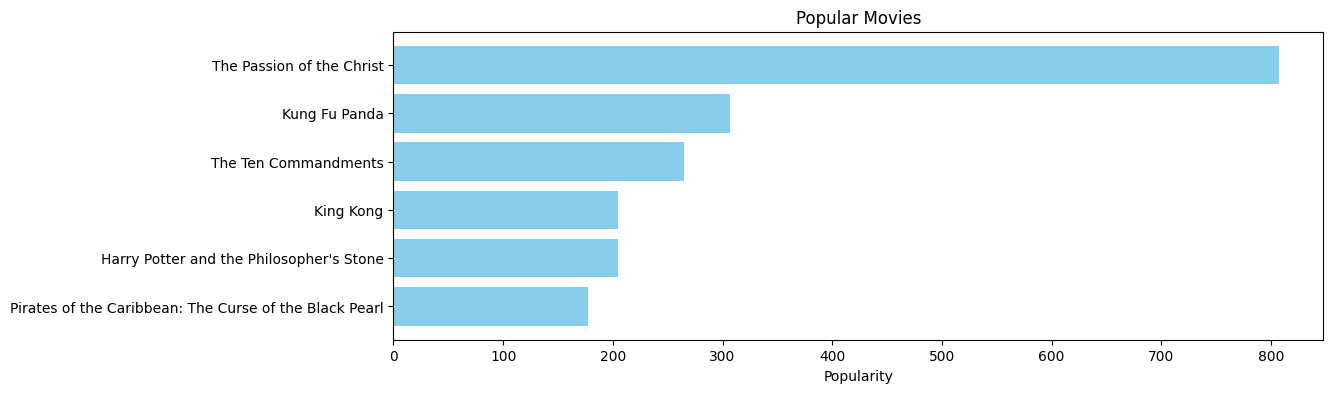

In [ ]:


pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")



## Content Based Filtering
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended

## Plot description based Recommender
We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. Let's take a look at the data. ..

In [ ]:
df2['overview'].head(5)

0    Blondie and Dagwood are about to celebrate the...
1                                                  NaN
2    Love at Twenty unites five directors from five...
3    Gee Atherton ripping the Worlds course the day...
4    Elmo is making a very, very super special surp...
Name: overview, dtype: object

we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

What is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give us a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5000, 20680)

We see that over 20,000 different words were used to describe the 5000 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

## Cosine Similarity(A, B) = (A • B) / (||A|| * ||B||)
## Cosine Similarity(A, B) = Σ(Ai * Bi) / (√(Σ(Ai^2)) * √(Σ(Bi^2)))


Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities()

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

Recommendation function, here are the following steps we'll follow :-

Get the index of the movie given its title.

Get the list of cosine similarity scores for that particular movie with all movies.
Convert it into a list of tuples where the first element is its position and the second is the similarity score.

Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.

Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).

Return the titles corresponding to the indices of the top elements.

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight')

225               Batman
331       Batman Forever
332       Batman & Robin
229        Batman Begins
4732            Ricochet
664                  JFK
301       Batman Returns
598             Face/Off
2768    Five Moons Plaza
1180     To End All Wars
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

606         Monty Python and the Holy Grail
2504                         The Nasty Girl
1548                   ...And Your Love Too
1946                         The Lost World
2191                The Castle of Fu Manchu
3391                                  Alibi
2909          Carry On Don't Lose Your Head
4729    Prince of Persia: The Sands of Time
3187                      Inn of the Damned
363                Sissi: The Young Empress
Name: title, dtype: object